<ins>Chaines de Markov et épidémiologie : propagation d’une épidémie dans une population<ins>
---

    By : BOUSBA Abdellah

In [1]:
import numpy as np 
import pandas as pd 
import random as rd
from collections import Counter as ct
import matplotlib.pyplot as plt

In [2]:
PSS = 0.9
PIS = 0.1
PII = 0.5
PRI = 0.5
PRR = 1
PIR = 0

Description du modèle
---
Question1:
---

In [3]:
p=pd.DataFrame(np.array([[PSS,PIS, 0], [0, PII, PRI], [0, PIR, PRR]]), index = ['S', 'I', 'R'], columns = ['S', 'I', 'R'])
p

,S,I,R
S,0.9,0.1,0.0
I,0.0,0.5,0.5
R,0.0,0.0,1.0


In [4]:
mat = np.asarray(p)

    La matrice ci-dessus est une matrice carré tq la somme de chaque ligne vaut 1 alors c'est une matrice stochastique

Question2:
---

    Au temps t=0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté. dans le monde SIR Π0 = (0.9,0.1,0)


In [5]:
P0 = np.asarray([0.9,0.1,0])
dic = {"S":0,"I":1,"R":2}

Tirage aléatoire des états
---


In [6]:
def getState(P0):
    return np.random.choice(np.asarray(["S","I","R"]), p=P0)

In [7]:
def getNState(P0,mat,n):
    P = P0
    m = mat
    out = ""
    for _ in range(n):
        out+=getState(P)
        P=np.matmul(P,m)
        
    return out

In [8]:
getNState(P0,mat,50)

'SSISISRSRRISSSRSRSRRSRRRRSRRRRRRRRRRRRRRRSRRRRRRRR'

Probabilité d’une séquence
---


In [9]:
def getProba(Seq):
    out = mat[dic[Seq[0]]][dic[Seq[0]]]
    old = Seq[0]
    Seq = Seq[1:]
    for x in Seq:
        out*=mat[dic[old]][dic[x]]
        old=x
    return out

Question1:
---

In [10]:
getProba("SSSSSSIIIIIIIIIIIR")

2.594926757812501e-05

Question2:
---

In [11]:
getProba("SSSSSSSSSSSSIIIR")

0.0035303692060125024

Modélisation d’une population
---

In [17]:
def plotData(n,mat,P0,taille):
    data=[]
    for _ in range(taille):
        data.append(np.asarray(list(getNState(P0,mat,n))))
    data=np.asarray(data)
    data=data.T
    data=[ct(x) for x in data]
    time=[]
    dataS=[]
    dataI=[]
    dataR=[]
    for i in range(n):
        time.append(i)
        dataS.append(data[i]["S"])
        dataI.append(data[i]["I"])
        dataR.append(data[i]["R"])
    plt.plot(time, dataS,label="Sain.e.s")
    plt.plot(time, dataI,label="infect.e.s")
    plt.plot(time, dataR,label="Gueri.e.s")
    plt.legend()

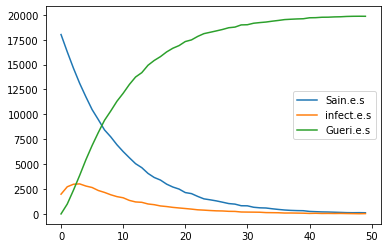

In [18]:
plotData(50,mat,P0,20000)

Modification du modèle
---

Question1:
---

 <ins> modification taille population : </ins>

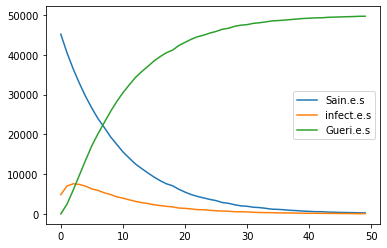

In [19]:
plotData(50,mat,P0,50000)

 <ins> modification proba initiale : </ins>

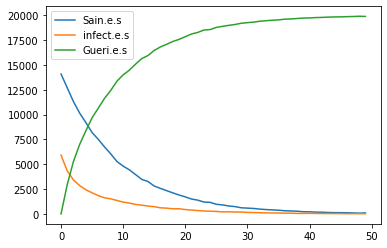

In [20]:
plotData(50,mat,np.asarray([0.7,0.3,0]),20000)

 <ins> modification proba transition : </ins>

In [21]:
p2=pd.DataFrame(np.array([[0.8,0.2, 0], [0, 0.6, 0.4], [0, 0, 1]]), index = ['S', 'I', 'R'], columns = ['S', 'I', 'R'])
p2

,S,I,R
S,0.8,0.2,0.0
I,0.0,0.6,0.4
R,0.0,0.0,1.0


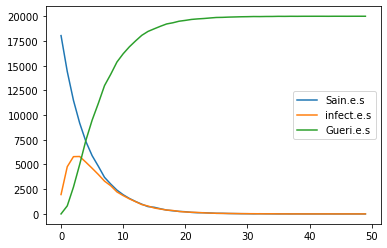

In [22]:
plotData(50,np.asarray(p2),P0,20000)

Question2:
---

 <ins> taux d'infection elevé : </ins>

In [26]:
p3=pd.DataFrame(np.array([[0.4,0.6, 0], [0, 0.5, 0.5], [0, 0, 1]]), index = ['S', 'I', 'R'], columns = ['S', 'I', 'R'])
p3

,S,I,R
S,0.4,0.6,0.0
I,0.0,0.5,0.5
R,0.0,0.0,1.0


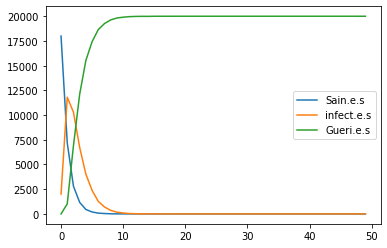

In [27]:
plotData(50,np.asarray(p3),P0,20000)

 <ins> taux d'infection faible : </ins> ( bonne mesure de distanciation sociale )

In [29]:
p4=pd.DataFrame(np.array([[0.98,0.02, 0], [0, 0.5, 0.5], [0, 0, 1]]), index = ['S', 'I', 'R'], columns = ['S', 'I', 'R'])
p4

,S,I,R
S,0.98,0.02,0.0
I,0.00,0.50,0.5
R,0.00,0.00,1.0


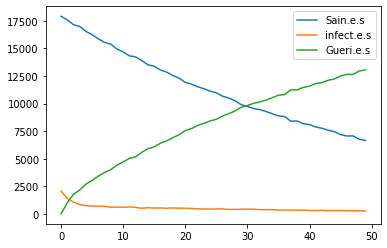

In [30]:
plotData(50,np.asarray(p4),P0,20000)

Question3:
---

In [31]:
p5=pd.DataFrame(np.array([[0.9,0.1, 0], [0, 0.5, 0.5], [0, 0.3, 0.7]]), index = ['S', 'I', 'R'], columns = ['S', 'I', 'R'])
p5

,S,I,R
S,0.9,0.1,0.0
I,0.0,0.5,0.5
R,0.0,0.3,0.7


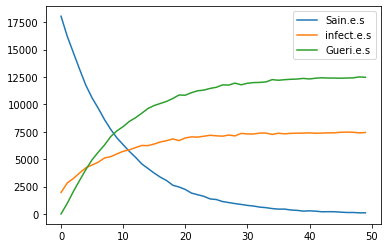

In [32]:
plotData(50,np.asarray(p5),P0,20000)

Question4:
---

    Dans ce modèle on ne peut pas prendre compte des parametres des individu etudier, par exemple pour le COVID-19 le taux d'infection pour les personnes agées ou malades avec une maladie chronique est plus elevés alors une bonne amelioration est de prendre en compte ces parametres en fonction de l'epidémie etudié pour avoir une meilleurs aproximation de l'evolution.